In [19]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [22]:
X=insurance_one_hot.drop("charges",axis=1)
Y=insurance_one_hot["charges"]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [24]:
tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics="mae")

insurance_model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8573.1816 - mae: 8573.1816
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7889.1074 - mae: 7889.1074
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7587.1431 - mae: 7587.1431
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7684.7163 - mae: 7684.7163
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7675.3047 - mae: 7675.3047
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7644.6904 - mae: 7644.6904
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7518.2275 - mae: 7518.2275
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7685.2437 - mae: 7685.2437
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7546.1294 - mae: 7546.1294
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7754.6357 - mae: 7754.6357

In [25]:
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 9073.0674 - mae: 9073.0674


[9073.0673828125, 9073.0673828125]

In [26]:
#model_2

tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics="mae")

history=insurance_model_2.fit(X_train,Y_train,epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13292.9287 - mae: 13292.9287
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13153.0596 - mae: 13153.0596
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12832.9287 - mae: 12832.9287
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12190.8623 - mae: 12190.8623
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 11103.2256 - mae: 11103.2256
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 9675.8750 - mae: 9675.8750
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 8309.9043 - mae: 8309.9043
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 7576.5732 - mae: 7576.5732
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 7433.3525 - mae: 7433.3525
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 7411.8979 - mae:

In [27]:
insurance_model_2.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3169.5769 - mae: 3169.5769


[3169.576904296875, 3169.576904296875]

Text(0.5, 0, 'epochs')

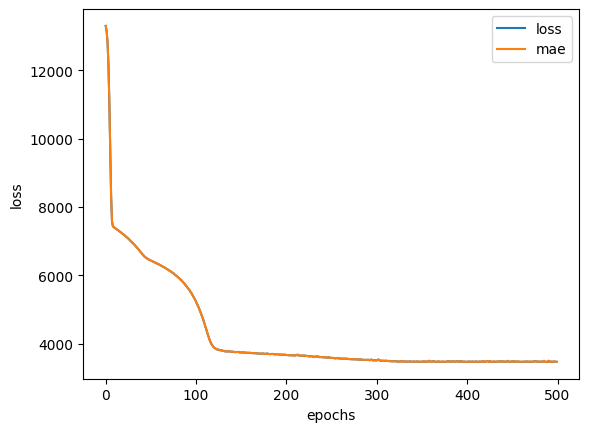

In [28]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [39]:
insurance1=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(),["sex","smoker","region"])
)

In [41]:
X=insurance1.drop("charges",axis=1)
Y=insurance1["charges"]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train

,age,sex,bmi,children,smoker,region
560,46,female,19.950,2,no,northwest
1285,47,female,24.320,0,no,northeast
1142,52,female,24.860,0,no,southeast
969,39,female,34.320,5,no,southeast
486,54,female,21.470,3,no,northwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [43]:
# fitting the column transformer to training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['sex', 'smoker', 'region'])])

In [60]:
# transforming the data
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)
len(X_train_normal),len(Y_train)

(1070, 1070)

In [54]:
tf.random.set_seed(42)

insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics="mae")

history=insurance_model_3.fit(X_train_normal,Y_train,epochs=250)

Epoch 1/250
34/34 [==============================] - 2s 3ms/step - loss: 13342.8418 - mae: 13342.8418
Epoch 2/250
34/34 [==============================] - 0s 3ms/step - loss: 13330.4658 - mae: 13330.4658
Epoch 3/250
34/34 [==============================] - 0s 3ms/step - loss: 13301.4316 - mae: 13301.4316
Epoch 4/250
34/34 [==============================] - 0s 4ms/step - loss: 13243.3154 - mae: 13243.3154
Epoch 5/250
34/34 [==============================] - 0s 4ms/step - loss: 13144.1836 - mae: 13144.1836
Epoch 6/250
34/34 [==============================] - 0s 5ms/step - loss: 12993.0596 - mae: 12993.0596
Epoch 7/250
34/34 [==============================] - 0s 4ms/step - loss: 12780.0928 - mae: 12780.0928
Epoch 8/250
34/34 [==============================] - 0s 4ms/step - loss: 12495.6943 - mae: 12495.6943
Epoch 9/250
34/34 [==============================] - 0s 4ms/step - loss: 12130.7314 - mae: 12130.7314
Epoch 10/250
34/34 [==============================] - 0s 4ms/step - loss: 11690.42

In [55]:
insurance_model_3.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3159.1946 - mae: 3159.1946


[3159.194580078125, 3159.194580078125]

In [57]:
Y_pred=insurance_model_3.predict(X_test_normal)

9/9 [==============================] - 0s 3ms/step
